## Practical Work 2
## Amira Adel Fouda - G2 AI

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score


To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [76]:
a = np.linspace(0,20)
b =-2*a+1

In [77]:
dict={'x0':1,'x1':a , 'y':b}
df=pd.DataFrame(dict)
df.head()

,x0,x1,y
0,1,0.000000,1.000000
1,1,0.408163,0.183673
2,1,0.816327,-0.632653
3,1,1.224490,-1.448980
4,1,1.632653,-2.265306


#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [103]:
alpha = 0.001
itera = 100
theta = np.matrix(np.array([0,0]))


In [104]:
col=df.shape[1]
a=np.matrix(df.loc[:,['x0','x1']])
b=np.matrix(df.loc[:,['y']])

In [105]:
a

matrix([[ 1.        ,  0.        ],
        [ 1.        ,  0.40816327],
        [ 1.        ,  0.81632653],
        [ 1.        ,  1.2244898 ],
        [ 1.        ,  1.63265306],
        [ 1.        ,  2.04081633],
        [ 1.        ,  2.44897959],
        [ 1.        ,  2.85714286],
        [ 1.        ,  3.26530612],
        [ 1.        ,  3.67346939],
        [ 1.        ,  4.08163265],
        [ 1.        ,  4.48979592],
        [ 1.        ,  4.89795918],
        [ 1.        ,  5.30612245],
        [ 1.        ,  5.71428571],
        [ 1.        ,  6.12244898],
        [ 1.        ,  6.53061224],
        [ 1.        ,  6.93877551],
        [ 1.        ,  7.34693878],
        [ 1.        ,  7.75510204],
        [ 1.        ,  8.16326531],
        [ 1.        ,  8.57142857],
        [ 1.        ,  8.97959184],
        [ 1.        ,  9.3877551 ],
        [ 1.        ,  9.79591837],
        [ 1.        , 10.20408163],
        [ 1.        , 10.6122449 ],
        [ 1.        , 11.020

In [106]:
b

matrix([[  1.        ],
        [  0.18367347],
        [ -0.63265306],
        [ -1.44897959],
        [ -2.26530612],
        [ -3.08163265],
        [ -3.89795918],
        [ -4.71428571],
        [ -5.53061224],
        [ -6.34693878],
        [ -7.16326531],
        [ -7.97959184],
        [ -8.79591837],
        [ -9.6122449 ],
        [-10.42857143],
        [-11.24489796],
        [-12.06122449],
        [-12.87755102],
        [-13.69387755],
        [-14.51020408],
        [-15.32653061],
        [-16.14285714],
        [-16.95918367],
        [-17.7755102 ],
        [-18.59183673],
        [-19.40816327],
        [-20.2244898 ],
        [-21.04081633],
        [-21.85714286],
        [-22.67346939],
        [-23.48979592],
        [-24.30612245],
        [-25.12244898],
        [-25.93877551],
        [-26.75510204],
        [-27.57142857],
        [-28.3877551 ],
        [-29.20408163],
        [-30.02040816],
        [-30.83673469],
        [-31.65306122],
        [-32.469

In [107]:
noBatch=10

In [108]:
def GDCostFunction(xc,yc,thetac):
    error=np.power(np.linalg.norm(((xc @ thetac.T)- yc),ord=2),2)
    mse=error/(2*len(xc))
    return mse

In [109]:
def gradient(X,Y,Theta):
    theta_parameters=int(Theta.ravel().shape[1]) 
    temp = np.matrix(np.zeros(theta.shape))
    for j in range(theta_parameters):
        error = (X*Theta.T) - Y              # (summation(h(xi) - y ) 
        t= np.multiply(error,X[:,j])         # (summation(h(xi) - y ) *xi
        temp[:,j] = 1/len(X) * np.sum(t)
    grad=temp
    return grad

#### Try your function with any input parameterss of your choice.

In [110]:
def mini_Batch_GD(x,y,theta,lr,iteration,noBatch):
    
    temp = np.matrix(np.zeros(theta.shape))
    theta_parameters=int(theta.ravel().shape[1])
    cost=[]
    theta_0=[]
    theta_1=[]
    h=[]
    batch_size=int(len(y)/ noBatch)
    
    for i in range(iteration):
        for j in range(0,len(y),batch_size):  # step = batch_size
            theta_0.append(theta[:,0])
            theta_1.append(theta[:,1])
            h.append(x * theta.T)
            x_i=x[j:j+batch_size]    # x[0:10,:] then x[10:20 ,:] and so .., till end of observatios.
            y_i=y[j:j+batch_size]    # y[0:10,:] then y[10:20 ,:] and so .., till end of observatios.
            cost.append(GDCostFunction(x_i,y_i,theta))
            temp = theta -lr * gradient(x_i,y_i,theta)
            theta=temp
            
            
    return theta,cost,theta_0,theta_1,h

In [111]:
theta_mini,cost_mini,th_0,th_1,hypo_mini = mini_Batch_GD(a,b,theta,alpha,itera,noBatch)


In [112]:
th_0 = np.array(th_0)
th_0 = th_0.ravel()
th_1 = np.array(th_1)
th_1 = th_1.ravel()

#### Calculate r2 score

#### Plot loss vs. epochs

Text(0, 0.5, 'Cost Value')

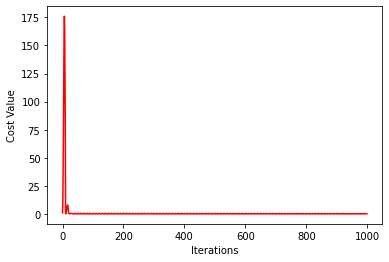

In [113]:
fig,ax = plt.subplots()
ax.plot(np.arange(len(cost_mini)), cost_mini ,'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

Text(0, 0.5, 'Cost Value')

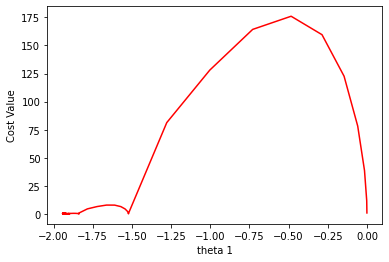

In [114]:
fig, ax = plt.subplots()
ax.plot(th_1,cost_mini,color='r')

ax.set_xlabel('theta 1')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

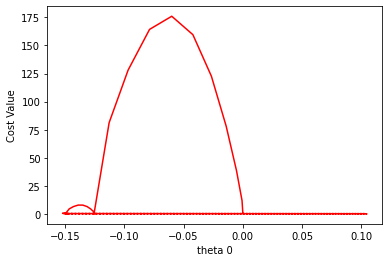

In [115]:
fig, ax = plt.subplots()
ax.plot(th_0,cost_mini,color='r')

ax.set_xlabel('theta 0')
ax.set_ylabel('Cost Value')

#### Plot all regression lines till converge

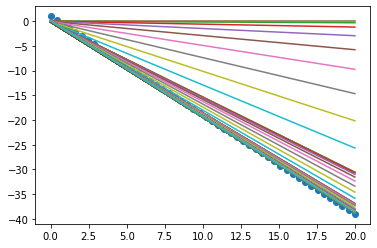

In [116]:
plt.scatter(df.x1,df.y)
for i in  hypo_mini:
    plt.plot(df.x1,i)

#### Plot the best regression line

Text(0, 0.5, 'y1- data')

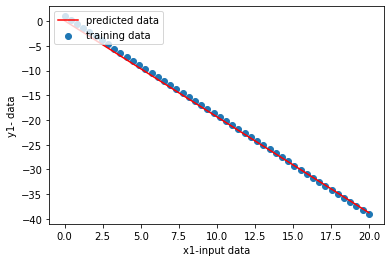

In [117]:
y_hat=theta_mini[0,0] + theta_mini[0,1]*df.x1
fig ,ax =plt.subplots()
ax.plot(df.x1 , y_hat , 'r', label='predicted data')
ax.scatter(df.x1 , df.y, label='training data')
ax.legend(loc=2)
ax.set_xlabel('x1-input data')
ax.set_ylabel('y1- data')


In [118]:
r2_score(df.y , y_hat) * 100

99.84207782244299

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [119]:
df_sh = pd.DataFrame(dict)
df_sh = df_sh.sample(frac=1)
df_sh.head()

,x0,x1,y
45,1,18.367347,-35.734694
17,1,6.938776,-12.877551
25,1,10.204082,-19.408163
20,1,8.163265,-15.326531
30,1,12.244898,-23.489796


In [120]:
col=df.shape[1]
n =np.matrix(df_sh.loc[:,['x0','x1']])
m =np.matrix(df_sh.loc[:,['y']])


In [121]:
def GDCostFunction(xc,yc,thetac):
    error=np.power(np.linalg.norm(((xc @ thetac.T)- yc),ord=2),2)
    mse=error/(2*len(xc))
    return mse
    

In [122]:
def gradient(X,Y,Theta):
    theta_parameters=int(Theta.ravel().shape[1]) 
    temp = np.matrix(np.zeros(theta.shape))
    for j in range(theta_parameters):
        error = (X*Theta.T) - Y              # (summation(h(xi) - y ) 
        t= np.multiply(error,X[:,j])         # (summation(h(xi) - y ) *xi
        temp[:,j] = 1/len(X) * np.sum(t)
    grad=temp
    return grad



In [123]:
def mini_Batch_GD(x,y,theta,lr,iteration,noBatch):
    
    temp = np.matrix(np.zeros(theta.shape))
    theta_parameters=int(theta.ravel().shape[1])
    cost=[]
    theta_0=[]
    theta_1=[]
    h=[]
    batch_size=int(len(y)/ noBatch)
    
    for i in range(iteration):
        for j in range(0,len(y),batch_size):  # step = batch_size
            theta_0.append(theta[:,0])
            theta_1.append(theta[:,1])
            h.append(x * theta.T)
            x_i=x[j:j+batch_size]    # x[0:10,:] then x[10:20 ,:] and so .., till end of observatios.
            y_i=y[j:j+batch_size]    # y[0:10,:] then y[10:20 ,:] and so .., till end of observatios.
            cost.append(GDCostFunction(x_i,y_i,theta))
            temp = theta -lr * gradient(x_i,y_i,theta)
            theta=temp
            
            
    return theta,cost,theta_0,theta_1,h

In [124]:
th_op_sh,cost_sh,th0_sh,th1_sh,hypo_sh = mini_Batch_GD(n,m,theta,alpha,itera,noBatch)

In [125]:
th0_sh=np.array(th0_sh)
th0_sh=th0_sh.ravel()
th1_sh=np.array(th1_sh)
th1_sh=th1_sh.ravel()

Text(0, 0.5, 'Cost Value')

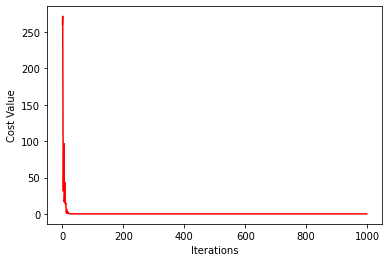

In [126]:
fig,ax = plt.subplots()
ax.plot(np.arange(len(cost_sh)), cost_sh ,'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'y1- data')

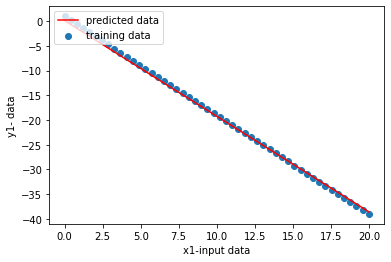

In [127]:
y_hat=th_op_sh[0,0] + th_op_sh[0,1]*df.x1
fig ,ax =plt.subplots()
ax.plot(df.x1 , y_hat , 'r', label='predicted data')
ax.scatter(df.x1 , df.y, label='training data')
ax.legend(loc=2)
ax.set_xlabel('x1-input data')
ax.set_ylabel('y1- data')

Text(0, 0.5, 'Cost Value')

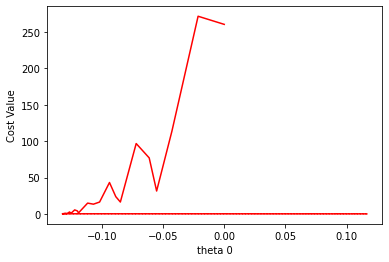

In [128]:
fig, ax = plt.subplots()
ax.plot(th0_sh , cost_sh ,color='r')

ax.set_xlabel('theta 0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

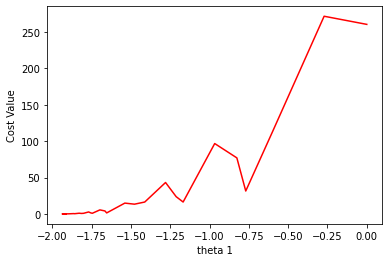

In [129]:
fig, ax = plt.subplots()
ax.plot(th1_sh,cost_sh,color='r')

ax.set_xlabel('theta 1')
ax.set_ylabel('Cost Value')

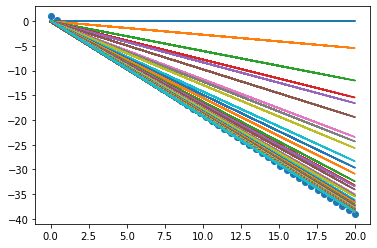

In [131]:
plt.scatter(df_sh.x1,df_sh.y)
for i in  hypo_sh:
    plt.plot(df_sh.x1,i)

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [148]:
x = np.linspace(0,20)
y=-2*x+1

In [149]:
x

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [150]:
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

In [151]:
dict={'x0':1,'x1':x , 'y':y}
df_s=pd.DataFrame(dict)
df_s= df_s.sample(frac=1)
df_s.head()

,x0,x1,y
1,1,0.408163,0.183673
3,1,1.224490,-1.448980
48,1,19.591837,-38.183673
10,1,4.081633,-7.163265
42,1,17.142857,-33.285714


In [155]:
alpha = 0.001
itera = 100
theta = np.matrix(np.array([0,0]))


In [156]:
col=df.shape[1]
x=np.matrix(df_s.iloc[:,0:col-1])
y=np.matrix(df_s.iloc[:,col-1:col])

In [157]:
theta=np.matrix([0,0])
theta

matrix([[0, 0]])

In [158]:
def GDCostFunction(xc,yc,thetac):
    norm = np.linalg.norm(((xc @ thetac.T)- yc),ord=2)
    error=np.power(norm,2)
    mse=error/(2*len(xc))
    return mse

In [159]:
def gradient(X,Y,Theta):
    theta_parameters=int(Theta.ravel().shape[1]) 
    temp = np.matrix(np.zeros(theta.shape))
    for j in range(theta_parameters):
        error = (X*Theta.T) - Y              # (summation(h(xi) - y ) 
        t= np.multiply(error,X[:,j])         # (summation(h(xi) - y ) *xi
        temp[:,j] = 1/len(X) * np.sum(t)
    grad=temp
    return grad

In [160]:
def Stocastic_GD(x,y,theta,lr,iteration):
    
    temp = np.matrix(np.zeros(theta.shape))
    theta_parameters=int(theta.ravel().shape[1])
    cost=[]
    th0=[]
    th1=[]
    h=[]
    batch_size=1
    
    for i in range(iteration):
        for j in range(0,len(y),batch_size):
            th0.append(theta[:,0])
            th1.append(theta[:,1])
            h.append(x*theta.T)
            x_i=x[j:j+batch_size]
            y_i=y[j:j+batch_size]
            cost.append(GDCostFunction(x_i,y_i,theta))
            temp = theta -lr * gradient(x_i,y_i,theta)
            theta=temp
            
            
    return theta,cost,th0,th1,h

In [161]:
th_op,cost,th0,th1,hypo = Stocastic_GD(x,y,theta,alpha,itera)


In [162]:
th0=np.array(th0)
th0=th0.ravel()
th1=np.array(th1)
th1=th1.ravel()

In [163]:
th_op

matrix([[ 0.69470952, -1.97688049]])

Text(0.5, 1.0, 'Error vs. training Epoc')

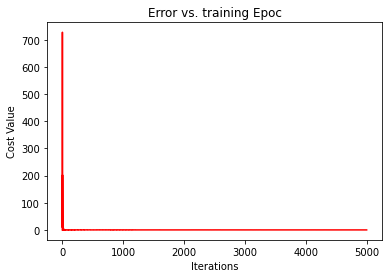

In [164]:
fig,ax = plt.subplots()
ax.plot(np.arange(len(cost)), cost ,'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')
ax.set_title('Error vs. training Epoc')

Text(0, 0.5, 'y1- data')

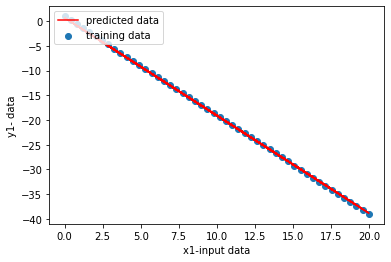

In [166]:
y_hat=th_op[0,0] + th_op[0,1]*df_s.x1
fig ,ax =plt.subplots()
ax.plot(df_s.x1 , y_hat , 'r', label='predicted data')
ax.scatter(df_s.x1 , df_s.y, label='training data')
ax.legend(loc=2)
ax.set_xlabel('x1-input data')
ax.set_ylabel('y1- data')

Text(0, 0.5, 'Cost Value')

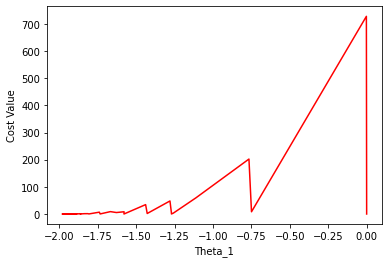

In [167]:
fig,ax = plt.subplots()
ax.plot(th1, cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

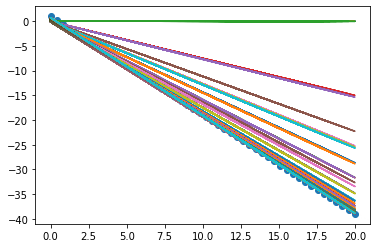

In [168]:
plt.scatter(df_s.x1,df_s.y)
for i in  hypo:
    plt.plot(df_s.x1,i)

Text(0, 0.5, 'Cost Value')

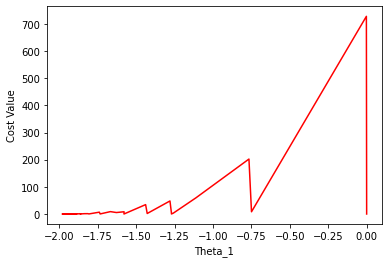

In [169]:
fig,ax = plt.subplots()
ax.plot(th1, cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

In [173]:
r2_score(df_s.y , y_hat)

0.9998268108697619

In [175]:
df_shu = df_s.sample(frac=1)
df_shu.head()

,x0,x1,y
5,1,2.040816,-3.081633
37,1,15.102041,-29.204082
15,1,6.122449,-11.244898
32,1,13.061224,-25.122449
36,1,14.693878,-28.387755


In [176]:
col=df.shape[1]
x_sh=np.matrix(df_shu.iloc[:,0:col-1])
y_sh=np.matrix(df_shu.iloc[:,col-1:col])

# with shuffling

In [201]:
def Stocastic_GD_sh(x,y,theta,lr,iteration):
    
    temp = np.matrix(np.zeros(theta.shape))
    theta_parameters=int(theta.ravel().shape[1])
    cost=[]
    th0=[]
    th1=[]
    h=[]
    batch_size=1
    
    for i in range(iteration):
        for j in range(0,len(y),batch_size):
            th0.append(theta[:,0])
            th1.append(theta[:,1])
            h.append(x*theta.T)
            x_i=x[j:j+batch_size]
            y_i=y[j:j+batch_size]
            cost.append(GDCostFunction(x_i,y_i,theta))
            temp = theta -lr * gradient(x_i,y_i,theta)
            theta=temp
            
            
    return theta,cost,th0,th1,h

In [202]:
alpha = 0.001
itera = 1000


In [203]:
theta_new_Shuf , cost_sh , theta_zero_sh , theta_one_sh , hypothesis_sh = Stocastic_GD_sh(x_sh,y_sh,theta,alpha,itera)
theta_new_Shuf

matrix([[ 0.99999745, -1.9999998 ]])

Text(0.5, 1.0, 'Error vs. training Epoc')

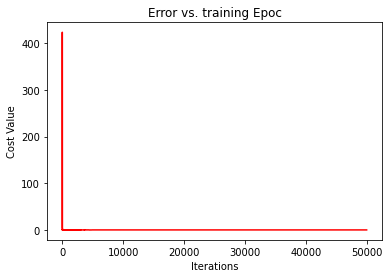

In [186]:
fig,ax = plt.subplots()
ax.plot(np.arange(len(cost_sh)), cost_sh ,'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')
ax.set_title('Error vs. training Epoc')

Text(0, 0.5, 'y1- data')

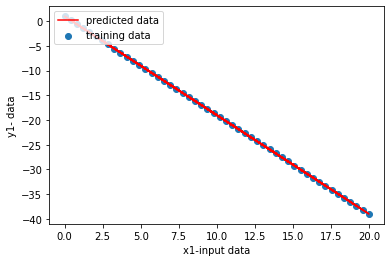

In [204]:
y_hat_sh=theta_new_Shuf[0,0] + theta_new_Shuf[0,1]*df_shu.x1
fig ,ax =plt.subplots()
ax.plot(df_shu.x1 , y_hat_sh , 'r', label='predicted data')
ax.scatter(df_shu.x1 , df_shu.y, label='training data')
ax.legend(loc=2)
ax.set_xlabel('x1-input data')
ax.set_ylabel('y1- data')

In [205]:
th_0=np.array(theta_zero_sh)
th_0=th0.ravel()
th_1=np.array(theta_one_sh)
th_1=th1.ravel()

Text(0, 0.5, 'Cost Value')

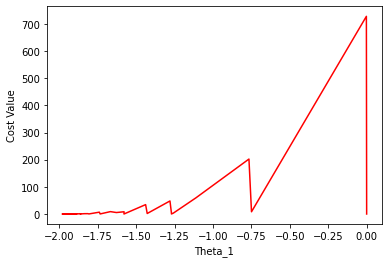

In [206]:
fig,ax = plt.subplots()
ax.plot(th_1, cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

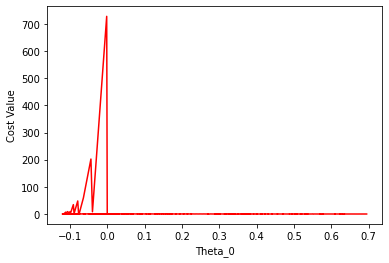

In [207]:
fig,ax = plt.subplots()
ax.plot(th_0, cost ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

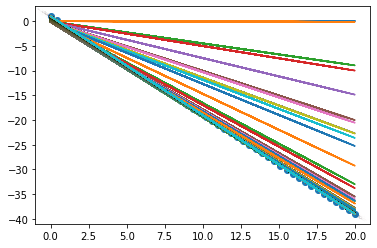

In [199]:
plt.scatter(df_shu.x1,df_shu.y)
for i in  hypothesis_sh:
    plt.plot(df_shu.x1,i)

In [209]:
r2_score(df_shu.y , y_hat_sh) * 100

99.99999999999878